## Exercise 10 - Decision tree

- Use the same dataset as in previous exercises (ex08 and ex09) (can be downloaded [here](http://student.labranet.jamk.fi/~hantt/data/voice.csv))
- Dataset includes male and female voice samples with different features
- In this exercise you will use supervised machine learning method called decision tree for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe. Filter dataframe for meanfun and IQR columns only.

In [5]:
import pandas as pd
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("data_files/voice.csv")
datasetfilt = dataset.loc[:,["meanfun","IQR"]]
datasetfilt

,meanfun,IQR
0,0.084279,0.075122
1,0.107937,0.073252
2,0.098706,0.123207
3,0.088965,0.111374
4,0.106398,0.127325
...,...,...
3163,0.182790,0.151859
3164,0.188980,0.162193
3165,0.209918,0.190936
3166,0.172375,0.176435


2 Divide the data with the following portions:
   - Training data 70 %
   - Test data 30 %

In [6]:
x = datasetfilt[["meanfun", "IQR"]]
y = dataset["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

3 Define classifier without the max_depth parameter. Use get_depth() method for the defined classifier. What value for tree depth was chosen automatically?

In [21]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(x_train, y_train)
print("Automatic max_depth is",clf.get_depth())


Automatic max_depth is 15


4 Visualise the tree structure and create the confusion matrix where you can compare true and predicted labels.

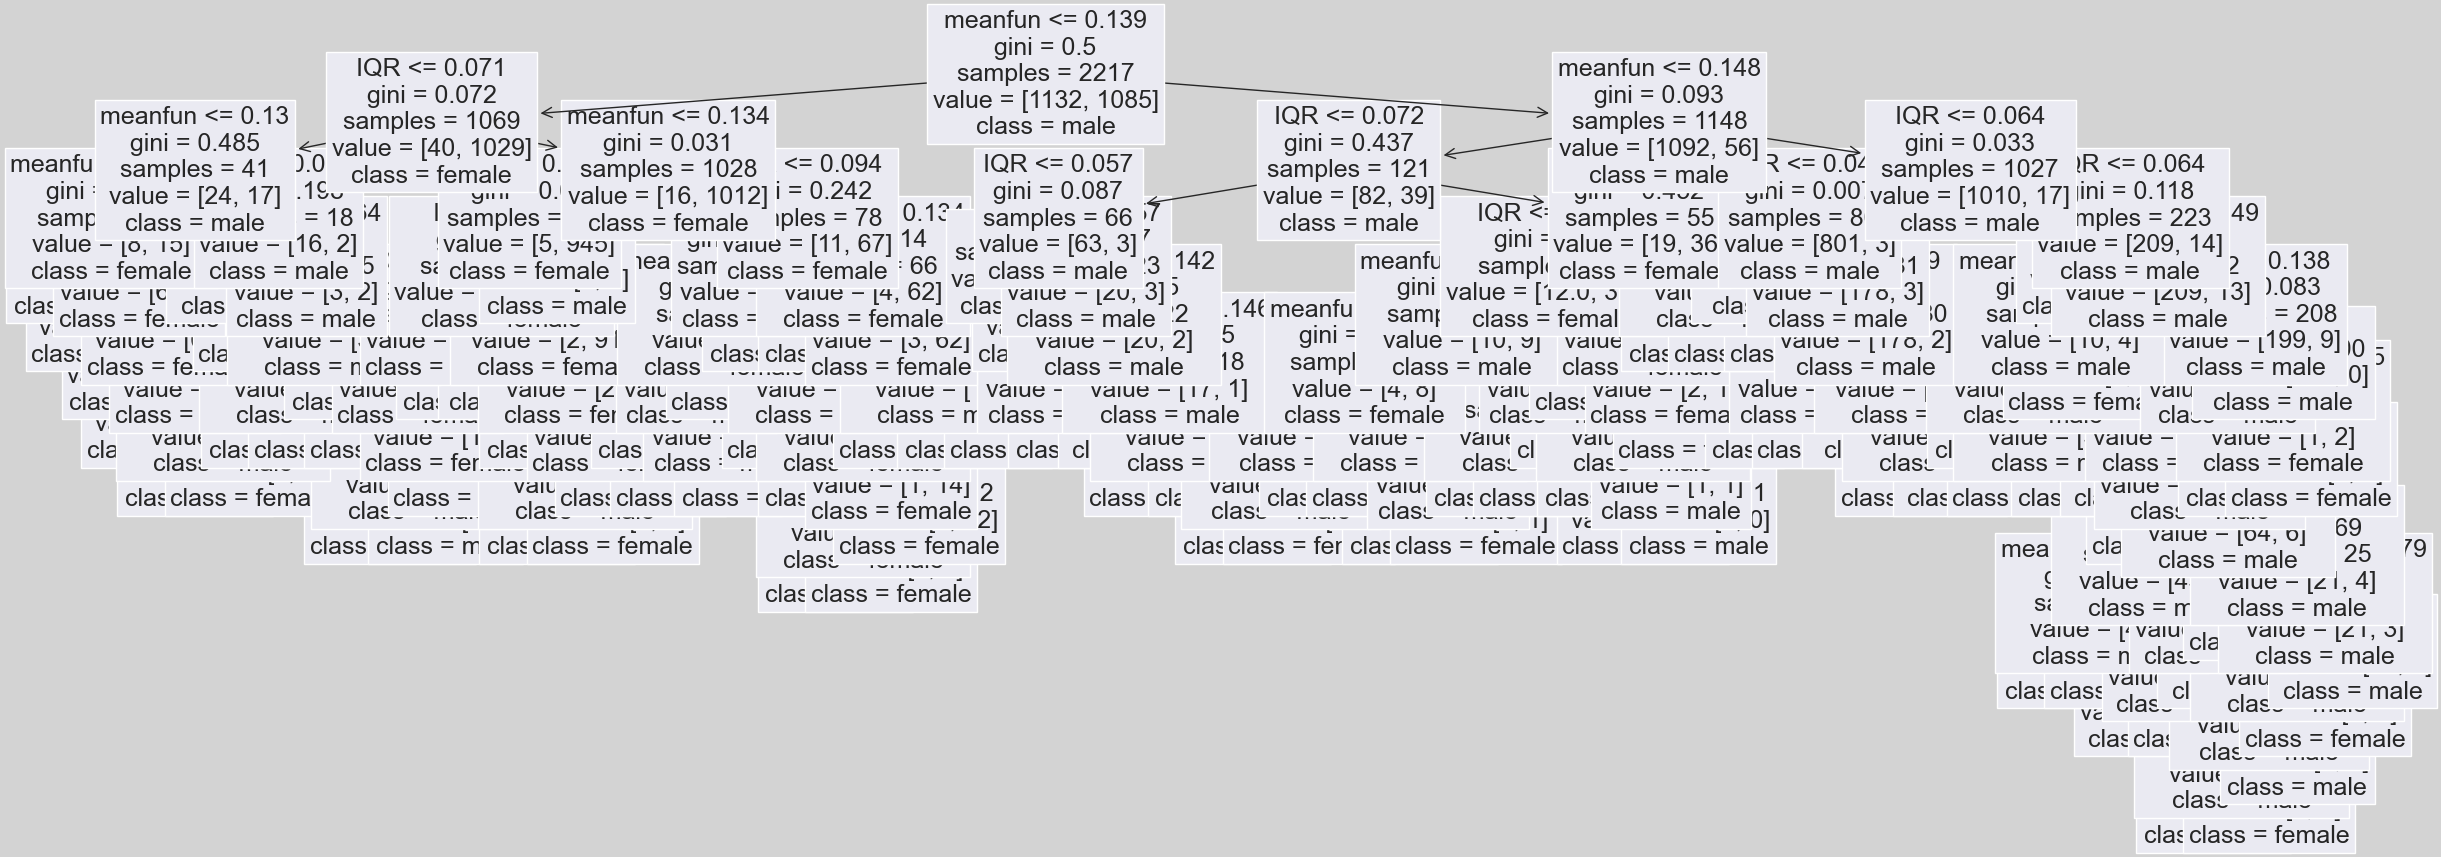

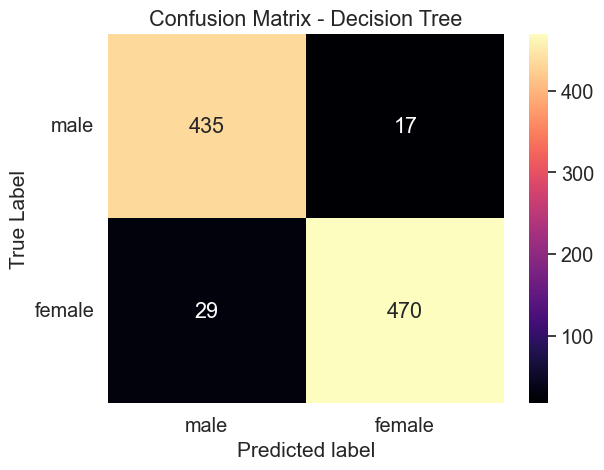

<Figure size 1500x1500 with 0 Axes>

In [25]:
feature_names = x.columns
labels = y.unique()
plt.figure(figsize = (30,10), facecolor = 'lightgray')

tree.plot_tree(clf, feature_names = feature_names, class_names = labels, fontsize = 18)

test_pred_decision_tree = clf.predict(x_test)
plt.show()

confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)


ax = plt.axes()
sns.set_theme(font_scale = 1.3)
plt.figure(figsize = (15,15))
sns.heatmap(confusion_matrix, annot = True, fmt = "g", ax = ax, cmap = "magma")


ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize = 15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize = 15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()